# Prepare Input

In [ ]:
import torch
import torch.nn as nn
import os
import numpy as np
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import cv2
import matplotlib.pyplot as plt

corrupt_cached = []

In [18]:
corrupt_cached = ['/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11285.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/666.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11853.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10501.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9565.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/9078.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7369.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6245.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/4833.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/8470.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3136.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/3300.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3588.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7514.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9171.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11565.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1773.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/Thumbs.db',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7276.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7978.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/12080.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7969.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11095.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11210.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1308.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5604.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5736.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2384.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10125.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11675.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3823.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7459.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/140.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/936.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/3491.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7968.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6238.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/2939.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10401.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7133.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/5686.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/5370.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1259.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/5553.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/9188.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6318.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/8730.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/850.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/660.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9778.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/2663.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10797.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2688.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7112.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10820.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/6435.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6718.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6059.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11935.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2877.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/4367.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11874.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11410.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1789.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10747.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1866.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3288.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10158.jpg',
 '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11849.jpg']

In [49]:

class DogvsCat(Dataset):
    def __init__(self,root_dir, transform=None , train=True, val_size=0.2, corrupted=False):
        self.root_dir = root_dir
        self.transform = transform
        self.cat_and_dog_1 = self.create_list_of_paths(train, val_size, corrupted)
        
        if corrupted:
            self.cat_and_dog_list = self.removed()
            
        else:
            self.cat_and_dog_list =self.cat_and_dog_1
    
    def __len__(self):
        return len(self.cat_and_dog_list)
    
    def __getitem__(self, idx):
        dog = os.path.join(root_dir, 'Dog')
        cat = os.path.join(root_dir, 'Cat')
        if idx % 2 ==0:
            try:
                img = Image.open(os.path.join(dog, self.cat_and_dog_list[idx]))
            except Exception as e:
                print(e)
        else:
            try:
                img = Image.open(os.path.join(cat, self.cat_and_dog_list[idx]))
            except Exception as e:
                print(e)
            
        label = 0 if idx % 2 == 0 else 1
        
        if self.transform:
            return self.transform(img), label
        
        
        return img, torch.from_numpy(np.array([label], dtype=int))
    
    def create_list_of_paths(self, train, val_size, corrupted):
        cat_and_dog = []
        
        dog = os.path.join(root_dir, 'Dog')
        cat = os.path.join(root_dir, 'Cat')
        
        dog_dir = os.listdir(dog)
        cat_dir = os.listdir(cat)
        
        for i, (x, y) in enumerate(zip(dog_dir, cat_dir)):
            # Verify the images first
            if not corrupted:
                self.verify_images(im_path=os.path.join(dog, dog_dir[i]))
                self.verify_images(im_path=os.path.join(cat, cat_dir[i]))
            
            cat_and_dog.append(dog_dir[i])
            cat_and_dog.append(cat_dir[i])
                  
        dog_dir.clear()
        cat_dir.clear()
        
        for i in corrupt_cached:
            if os.path.split(i)[1] in cat_and_dog:
                cat_and_dog.remove(os.path.split(i)[1])
#                 print("removed " , os.path.split(i)[1])
                
        if train:
            return cat_and_dog[:int(len(cat_and_dog)*(1-val_size))]
        else:
            return cat_and_dog[int(len(cat_and_dog)*(1-val_size)):]
        
    def verify_images(self, im_path):
        try:
            im = Image.open(im_path)
            if im.mode != 'RGB' or im.mode== 'L':
                print(f"Channels mismatch {im.mode}")
                corrupt_cached.append(im_path)
            im.verify()
        except Exception as e:
            corrupt_cached.append(im_path)
            return False
        
        return True
    
    def return_list(self):
        return self.cat_and_dog_list
    
    def removed(self):
        for i in corrupt_cached:
            if os.path.split(i)[1] in self.cat_and_dog_1:
#                 print("before",len(self.cat_and_dog_1))
                self.cat_and_dog_1.remove(os.path.split(i)[1])
#                 print(len(self.cat_and_dog_1))
                
        return self.cat_and_dog_1
        

In [50]:

root_dir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/'
transform_to_tensor = transforms.Compose([transforms.PILToTensor(), transforms.ConvertImageDtype(torch.float32), transforms.Normalize(mean=[0], std=[1]), transforms.Resize((244, 244))])



In [51]:
train_data = DogvsCat(root_dir, transform_to_tensor, train=True, val_size=0.2, corrupted=True )
test_data = DogvsCat(root_dir, transform_to_tensor, train=False, val_size=0.2, corrupted=True)

In [52]:
print(train_data[160][0].shape)

torch.Size([3, 244, 244])


In [53]:
print(len(train_data), len(test_data))

19888 4974


In [54]:
ls = train_data.return_list()
len(ls)
ls[160]

'6365.jpg'

In [8]:
# for i in tqdm(ls):
#     p = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/', im) if idx%2==0 else os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/', im)
#     img_shape = transform_to_tensor(Image.open(p)).shape
#     if img_shape != (3,244,244):
#         print(img_shape)
    

In [9]:
        
# for idx, im in enumerate(tqdm(ls)):
#     p = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/', im) if idx%2==0 else os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/', im)
#     if p in corrupt_cached:
#         print(p)
#     else:
#         img_shape = transform_to_tensor(Image.open(p)).shape
#         if img_shape != (3,244,244):
#             print(img_shape)
            

In [55]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=False, num_workers=0)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)

Text(0.5, 1.0, 'tensor(0)')

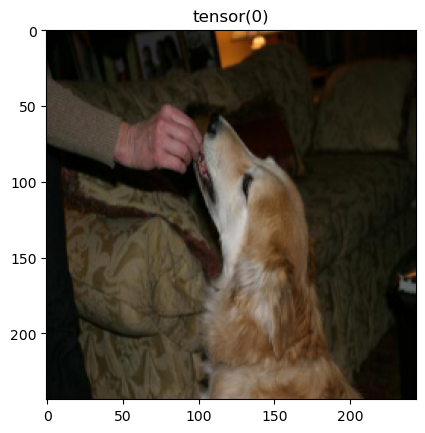

In [56]:
xx = next(iter(train_dataloader))
plt.imshow(xx[0][4].permute(1,2,0))
plt.title(xx[1][4])

In [57]:
import torchvision.models as models
model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

In [58]:
for param in model.parameters():
    param.requires_grad = False

In [59]:
model.classifier[6] = nn.Linear(in_features=4096, out_features=2, bias=True)

In [63]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [65]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[-1].parameters(), lr=0.001)


In [149]:
from tqdm.auto import tqdm
EPOCHS = 1

for epoch in range(EPOCHS):
    for inputs, label in tqdm(train_dataloader):
        inputs, label = inputs.to(device), label.to(device)
        model.train()
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = criterion(outputs, label)
        
        loss.backward()
        optimizer.step()
        
    with torch.inference_mode():
        total_correct = 0
        total_samples = 0
        
        for inputs, labels in tqdm(test_dataloader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            _, predictions = torch.max(outputs, 1)
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

        accuracy = total_correct / total_samples
        print(f"Epoch {epoch+1}/{EPOCHS}, validation accuracy: {accuracy:.4f}, validation Loss {loss:.6f}")
            

  0%|          | 0/622 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch 1/1, validation accuracy: 0.8973, validation Loss 0.046436


# Predict Image

In [150]:
import random
def predict():
    idx = random.randint(0, len(test_data))
    
    
    pred = model(test_data[idx][0].unsqueeze(dim=0).to(device))
    actual = test_data[idx][1]
    pred_label = torch.argmax(torch.softmax(pred, dim=1)).item()
    
    title = 'Dog' if pred_label == 0 else 'Cat'
    actual_title = 'Dog' if actual == 0 else 'Cat'
    plt.imshow(test_data[idx][0].permute(1,2,0))
    plt.title(f"pred {title} actual {actual_title}")
    print(pred_label)
    plt.show()
    

0


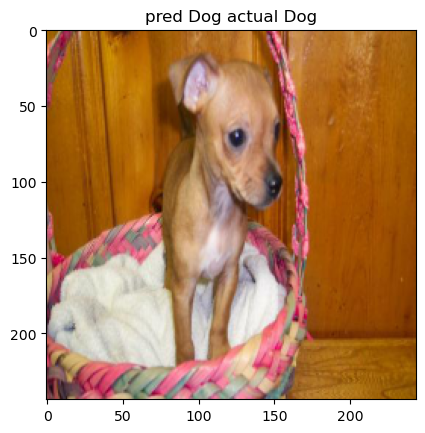

In [151]:
predict()

# Save model

In [152]:
torch.save(model.state_dict(), 'model-alexnet-transfer.pt')

In [153]:
torch.save(model, 'model-full-alexnet')

In [154]:
m1 = torch.load('model-full-alexnet')

In [158]:
pred = m1(test_data[0][0].unsqueeze(dim=0).to(device))
predl = torch.argmax(torch.softmax(pred, dim=1))
print(True if predl.item()== test_data[0][1] else False)

True
